# Data Analytics for Gamified To Do List

In [1]:
import pandas as pd

In [2]:
import os
import pandas as pd
from class_profile import Profile
from file_functions import append_dict_json, read_file, sort_json, load_file
from data_functions import convert_dataframe

In [3]:
joshua = Profile("Joshua", 0, 1)
data = load_file(joshua.name)
df = convert_dataframe(data)

In [4]:
print("Duplicated Rows: ", df.duplicated().sum())

Duplicated Rows:  0


In [5]:
df

,category,description,date,difficulty,points,status
0,Personal,journal,2024-12-6,2,5,completed
1,Personal,type 10,2024-12-6,1,5,completed
2,Household,refill water,2024-12-6,1,5,completed
3,Personal,program,2024-12-6,3,5,pending
4,Personal,isc2,2024-12-6,2,5,pending
5,Personal,organize notepads,2024-12-6,1,5,pending
6,Personal,organize files,2024-12-6,1,5,pending
7,Personal,file of first steps,2024-12-6,1,5,pending
8,Personal,shower,2024-12-6,1,5,pending
9,Personal,toothbrush,2024-12-6,1,5,completed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     34 non-null     object
 1   description  34 non-null     object
 2   date         34 non-null     object
 3   difficulty   34 non-null     int64 
 4   points       34 non-null     int64 
 5   status       34 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.7+ KB


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
print("Unique Values in Description Column:", len(df['description'].unique()))

Unique Values in Description Column: 19


In [9]:
df['description'].value_counts()

description
journal                        2
type 10                        2
refill water                   2
program                        2
isc2                           2
organize notepads              2
organize files                 2
file of first steps            2
shower                         2
toothbrush                     2
read book                      2
duolingo                       2
haircut                        2
google slides                  2
budget management              2
wash dishes                    1
cut nails                      1
hannah picture edit            1
photostudio for new profile    1
Name: count, dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [11]:
df['status'].unique()

array(['completed', 'pending'], dtype=object)

In [12]:
average_completion_per_date = df.groupby('date')['status'].value_counts()
average_completion_per_date

date        status   
2024-12-06  pending      11
            completed     8
2024-12-07  completed     8
            pending       7
Name: count, dtype: int64

In [13]:
average_points_per_completion_date = df.groupby('status')['points'].sum()
average_points_per_completion_date

status
completed    80
pending      90
Name: points, dtype: int64

In [ ]:
test_df = df.groupby('description')['status'].value_counts()
test_df

description                  status   
budget management            pending      2
cut nails                    completed    1
duolingo                     completed    2
file of first steps          pending      2
google slides                pending      2
haircut                      completed    1
                             pending      1
hannah picture edit          completed    1
isc2                         completed    1
                             pending      1
journal                      completed    2
organize files               pending      2
organize notepads            pending      2
photostudio for new profile  pending      1
program                      pending      2
read book                    pending      2
refill water                 completed    2
shower                       completed    1
                             pending      1
toothbrush                   completed    2
type 10                      completed    2
wash dishes                  complete

In [15]:
df[(df['status'] == 'completed') & (df['date'] == '6/12/2024')].value_counts()

Series([], Name: count, dtype: int64)

# Data Visualization

In [16]:
import matplotlib.pyplot as plt

In [17]:
df

,category,description,date,difficulty,points,status
0,Personal,journal,2024-12-06,2,5,completed
1,Personal,type 10,2024-12-06,1,5,completed
2,Household,refill water,2024-12-06,1,5,completed
3,Personal,program,2024-12-06,3,5,pending
4,Personal,isc2,2024-12-06,2,5,pending
5,Personal,organize notepads,2024-12-06,1,5,pending
6,Personal,organize files,2024-12-06,1,5,pending
7,Personal,file of first steps,2024-12-06,1,5,pending
8,Personal,shower,2024-12-06,1,5,pending
9,Personal,toothbrush,2024-12-06,1,5,completed


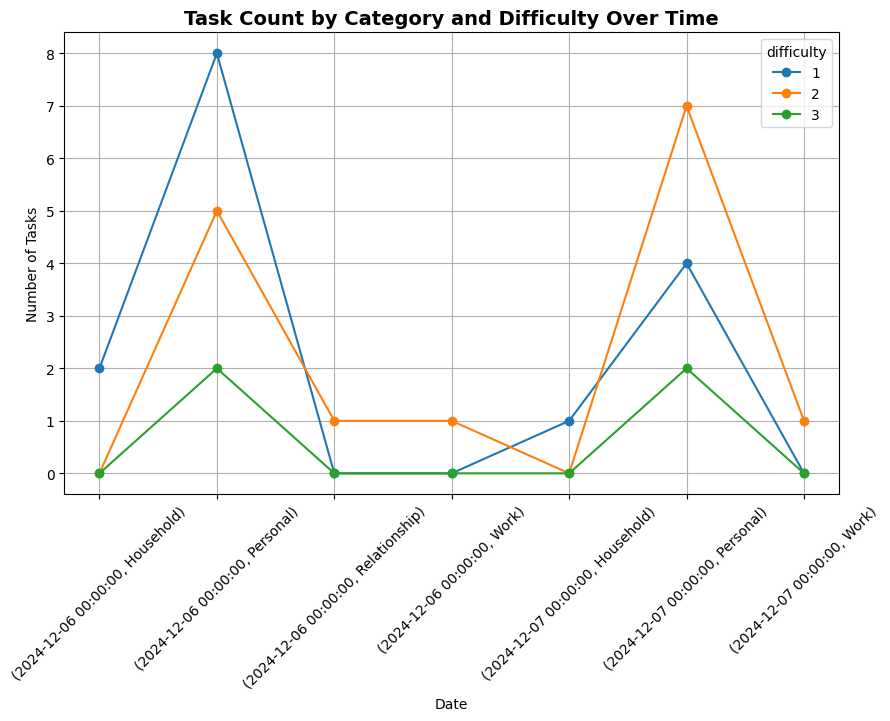

In [99]:
# Group by date, category, and difficulty, and count the number of tasks
tasks_by_category_diff = df.groupby(['date', 'category', 'difficulty']).size().unstack(fill_value=0)

# Plot each difficulty level as a line in each category
tasks_by_category_diff.plot(kind='line', marker='o', figsize=(10, 6))

# Adding a title and labels
plt.title("Task Count by Category and Difficulty Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Number of Tasks")

# Display the line graph
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [81]:
test_df = df.groupby('category')['difficulty'].value_counts().sum()
test_df

np.int64(34)

In [87]:
difficulty_counts = pd.DataFrame()
difficulty_counts = df['difficulty'].value_counts()
difficulty_counts


difficulty
2    15
1    15
3     4
Name: count, dtype: int64

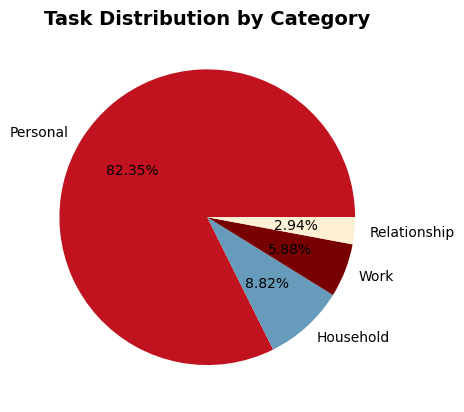

In [101]:
# Count the number of tasks for each category
category_counts = df['category'].value_counts()

# Create the pie chart for categories
plt.pie(category_counts, labels=category_counts.index, autopct="%.2f%%", colors=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"], textprops={'color':'black'})

# Adding a title
plt.title("Task Distribution by Category", fontsize=14, fontweight="bold")

# Display the pie chart
plt.show()

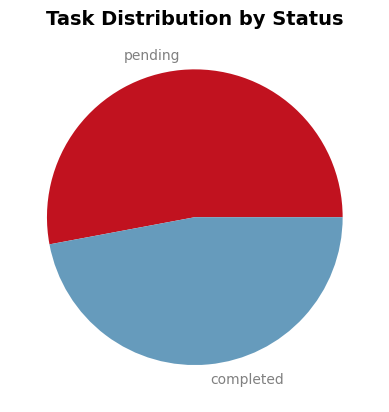

In [91]:
# Count the number of tasks for each status
status_counts = df['status'].value_counts()

# Create the pie chart for task status
plt.pie(status_counts, labels=status_counts.index, colors=["#c1121f", "#669bbc"], textprops={'color':'gray'})

# Adding a title
plt.title("Task Distribution by Status", fontsize=14, fontweight="bold")

# Display the pie chart
plt.show()

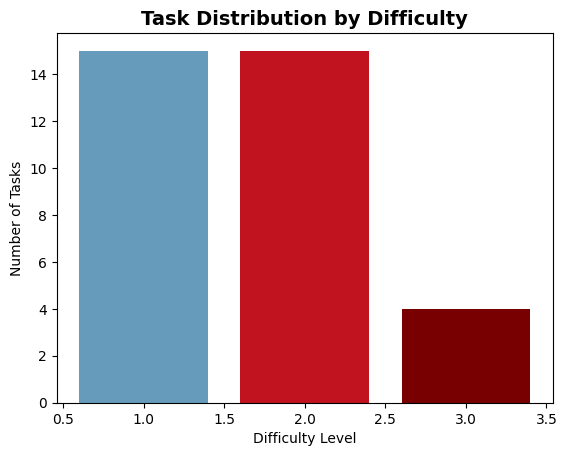

In [92]:
# Count the number of tasks for each difficulty level
difficulty_counts = df['difficulty'].value_counts()

# Create a bar graph for difficulty
plt.bar(difficulty_counts.index, difficulty_counts.values, color=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"])

# Adding a title and labels
plt.title("Task Distribution by Difficulty", fontsize=14, fontweight="bold")
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()

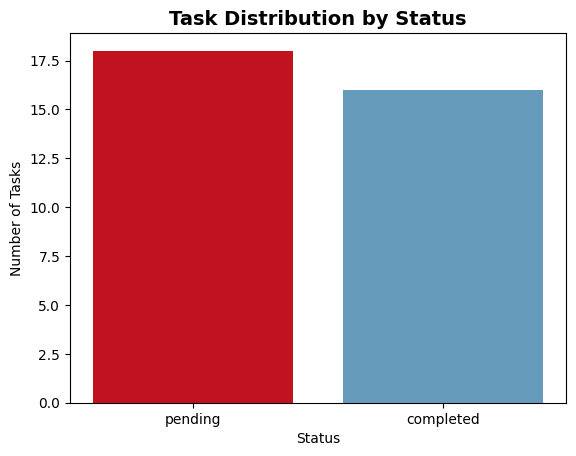

In [93]:
# Count the number of tasks for each status
status_counts = df['status'].value_counts()

# Create a bar graph for task status
plt.bar(status_counts.index, status_counts.values, color=["#c1121f", "#669bbc"])

# Adding a title and labels
plt.title("Task Distribution by Status", fontsize=14, fontweight="bold")
plt.xlabel("Status")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()

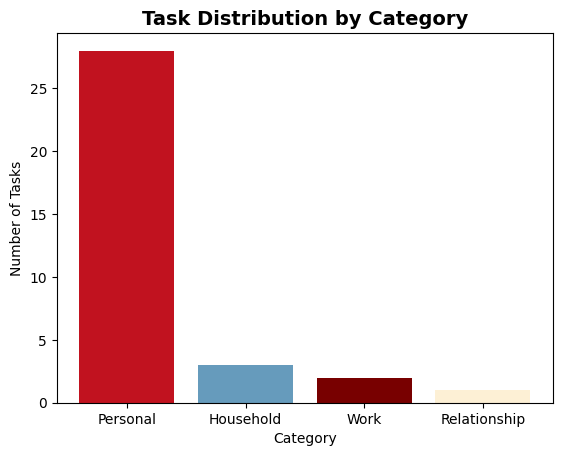

In [94]:
# Count the number of tasks for each category
category_counts = df['category'].value_counts()

# Create a bar graph for categories
plt.bar(category_counts.index, category_counts.values, color=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"])

# Adding a title and labels
plt.title("Task Distribution by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()